In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df_fraude = pd.read_csv('/content/drive/MyDrive/Python/fraude_cred.csv',sep=',')
df_fraude.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df_fraude.shape

(6362620, 11)

In [7]:
df_fraude.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

**Nombre de variable y descripción**

**step**: Cantidad de horas transacurridas durante el periodo de seguimiento de las transacciones.

**type**: 
Tipo de operaciones:
Cash-in: Ingreso de dinero.
Cash-out: Emision de dinero.
Debit: Recibi dinero.
Payment: Pago de consumo.
Transfer: Transferencia de dinero.

**amount:**Monto de la transacciones en moneda local.

**nameOrig**: Nombre del cliente que inicia la transaccion.

**oldbalanceOrg**: Balance de cuenta antes de transaccion.

**newbalanceOrig**: Balance de cuenta despues de transaccion.

**nameDest**: ID de cliente que recibe la trnsaccion.

**oldbalanceDest**: Balance de cuenta antes de transaccion de quien recibe la transaccion.

**newbalanceDest**: Balance de cuenta despues de transaccion de quien recibe la transaccion.

**isFraud**: Fraude  si o no.

**isFlaggedFraud**: Identifica intentos ilegales de transfereir mas de 200 mil dolares.



In [8]:
df_fraude.info

<bound method DataFrame.info of          step      type      amount  ... newbalanceDest  isFraud  isFlaggedFraud
0           1   PAYMENT     9839.64  ...           0.00        0               0
1           1   PAYMENT     1864.28  ...           0.00        0               0
2           1  TRANSFER      181.00  ...           0.00        1               0
3           1  CASH_OUT      181.00  ...           0.00        1               0
4           1   PAYMENT    11668.14  ...           0.00        0               0
...       ...       ...         ...  ...            ...      ...             ...
6362615   743  CASH_OUT   339682.13  ...      339682.13        1               0
6362616   743  TRANSFER  6311409.28  ...           0.00        1               0
6362617   743  CASH_OUT  6311409.28  ...     6379898.11        1               0
6362618   743  TRANSFER   850002.52  ...           0.00        1               0
6362619   743  CASH_OUT   850002.52  ...     7360101.63        1             

In [9]:
df_fraude.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Variable Target

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<bound method Series.sort_index of 0    6354407
1       8213
Name: isFraud, dtype: int64>

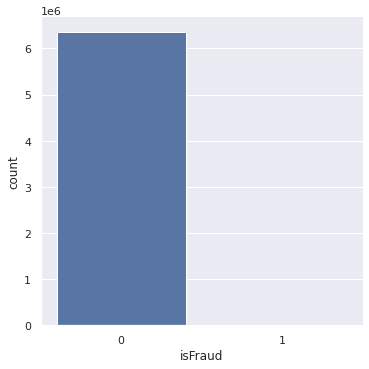

In [10]:
sns.factorplot('isFraud',data=df_fraude,kind='count')
df_fraude['isFraud'].value_counts(0).sort_index

Valor 0 = 0.998709 = 99.8709% = 6'354,407

Valor 1 = 0.001291 = 0.1291%  =     8,213

Total = 6'362,620

In [11]:
df_fraude.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [1]:
plt.figure(figsize=(12,6))
sns.boxplot(x="type",y="isFraud", hue="isFraud", data=df_fraude)

NameError: ignored

In [ ]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))
    
    return(x)

In [ ]:
df_fraude_tratamiento = df_fraude[['isFraud']].apply(lambda x: outlier_capping(x))

In [ ]:
df_fraude_tratamiento.head(10)

,isFraud
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Se determina en que tipos de transacciones se realizan los fraudes buscados.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


isFraud      
            count   sum
type                   
CASH_IN   1399284     0
CASH_OUT  2237500  4116
DEBIT       41432     0
PAYMENT   2151495     0
TRANSFER   532909  4097

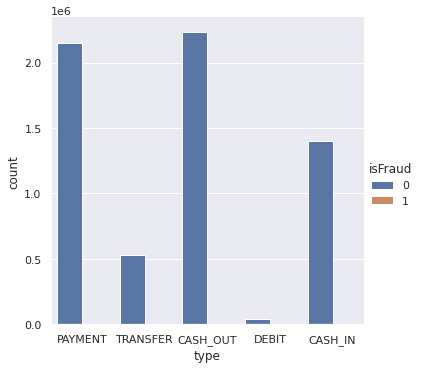

In [ ]:
sns.factorplot('type',data=df_fraude,hue='isFraud',kind="count")
df_fraude[['type','isFraud']].groupby(['type'], as_index=False).agg(['count','sum'])

Se observa que los fraudes se realizaron en los tipos de transacciones Cash_Out y Transfer

Variable cuantitativa.

Medidas estadísticas.

In [ ]:
df_fraude.describe()
df_fraude.round(2)  

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
Variables = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

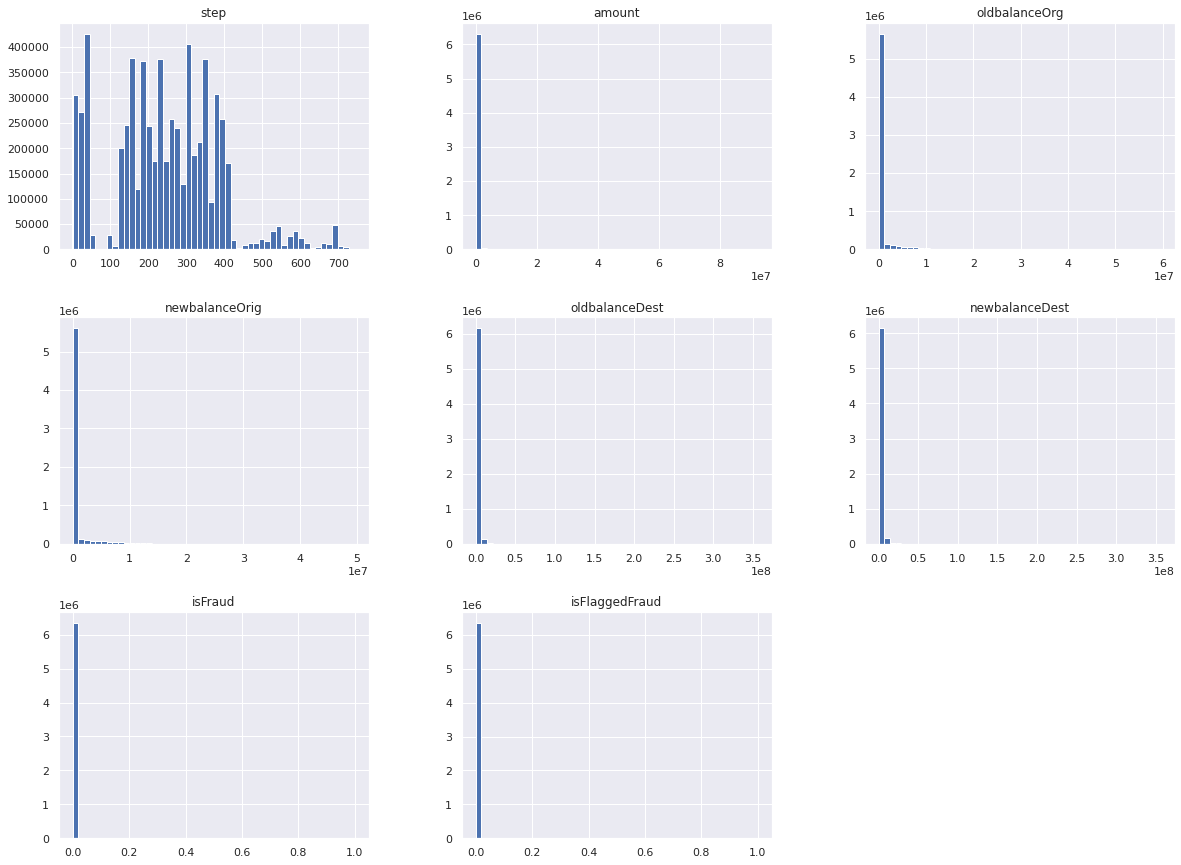

In [ ]:
df_fraude[Variables].hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
Variables = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

In [ ]:
sns.pairplot(df_fraude[Variables], height=3, diag_kind='kde', hue='isFraud')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Correlaciones

In [ ]:
corr = df_fraude[['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

NameError: ignored

In [ ]:
transf = df_fraude[(df_fraude['amount']>200000) & (df_fraude['isFlaggedFraud']=='1')]

